In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Load Train and Test Data

In [2]:
train_data=np.load('train_data.npy')
train_labels=np.load('train_labels.npy')
test_data=np.load('test_data.npy')
test_labels=np.load('test_labels.npy')

In [3]:
train_data.shape

(7500, 784)

In [4]:
train_labels.shape

(7500,)

In [5]:
test_data.shape

(1000, 784)

## Display How Images Are Look Like

In [6]:
def image_show(row,type_data):
    img=None
    label=None
    if(type_data=='train'):
        img=train_data[row].reshape(28,-1)
        label=train_labels[row]
    else:
        img=test_data[row].reshape(28,-1)
        label=test_labels[row]
    plt.imshow(img,cmap='gray')
    plt.title('Digit= '+str(label),size=20)
    plt.axis('off')
    plt.show()

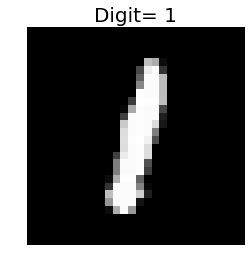

In [7]:
image_show(43,'train')

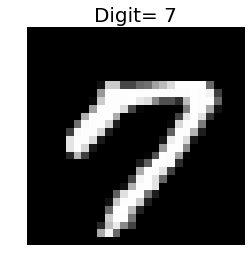

In [8]:
image_show(564,'test')

## Classification Using K-d Trees

In [9]:
from sklearn.neighbors import KDTree

In [10]:
tree=KDTree(train_data)

In [11]:
time_before=time.time()
test_neighbors_kd=tree.query(test_data,k=3,return_distance=False)
time_after=time.time()
kd_time=time_after-time_before

In [12]:
#test_neighbors_kd=np.squeeze(test_neighbors_kd)

## Classification Using Ball Trees

In [13]:
from sklearn.neighbors import BallTree

In [14]:
tree=BallTree(train_data)

In [15]:
time_before=time.time()
test_neighbors_ball=tree.query(test_data,k=3,return_distance=False,dualtree=True)
time_after=time.time()
ball_time=time_after-time_before

In [16]:
#test_predictions_ball=np.squeeze(test_predictions_ball)

## Calculate Nearest Neighbor Label

In [17]:
from collections import Counter
def calc_neighbor(neighbors):
    pred=[]
    for i in range(neighbors.shape[0]):
        pred.append(Counter(neighbors[i]).most_common(1)[0][0])
    return pred

In [18]:
test_predictions_kd=np.array(calc_neighbor(test_neighbors_kd))
test_predictions_ball=np.array(calc_neighbor(test_neighbors_ball))
test_predictions_kd=train_labels[test_predictions_kd]
test_predictions_ball=train_labels[test_predictions_ball]

## Accuracy Calculation

In [19]:
def accuracy(actual,pred):
    count=0
    for i,j in zip(actual,pred):
        if(i==j):
            count+=1
    return (count/(len(actual)))*100

In [20]:
kd_tree_accuracy=accuracy(test_predictions_kd,test_labels)
ball_tree_accuracy=accuracy(test_predictions_ball,test_labels)

In [21]:
print("Accuracy of \nKD-TREES={0} \nBALL-TREES={1}".format(kd_tree_accuracy,ball_tree_accuracy))

Accuracy of 
KD-TREES=95.39999999999999 
BALL-TREES=95.39999999999999


## Time To Classify Test Data Sets

In [22]:
print("Time to search \nKD-TREES={0} \nBALL-TREES={1}".format(kd_time,ball_time))

Time to search 
KD-TREES=9.41326904296875 
BALL-TREES=7.056631326675415
